In [39]:
#https://practicaldatascience.co.uk/machine-learning/how-to-create-a-classification-model-using-xgboost
#https://www.datasnips.com/5/tuning-xgboost-with-grid-search/
#https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
#https://stackoverflow.com/questions/44511636/plot-feature-importance-with-feature-names

import json
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, model_selection, pipeline, manifold, preprocessing, feature_selection
import gensim
import gensim.downloader as gensim_api


data = pd.read_csv('Scombined.csv')

#data.drop(['length'], inplace = True, axis = 1)
data

#Self text column is the raw version of the posts
#Clean > cleaned from hyperlinks
#text > lowered, cleaned from punctuation
#rem2 is cleaned, tokenized, stopwords removed

,selftext,y,clean,text,length,rem2
0,I've used this app called 'Relax Melodies' for...,0,I've used this app called 'Relax Melodies' for...,i ve used this app called relax melodies for o...,886,used app called relax melodies two years app i...
1,I felt reasonably tired at my bed time. I got ...,0,I felt reasonably tired at my bed time. I got ...,i felt reasonably tired at my bed time i got i...,214,felt reasonably tired bed time got bed closed ...
2,And to hear how they slept poorly the next day...,0,And to hear how they slept poorly the next day...,and to hear how they slept poorly the next day...,61,hear slept poorly next day luxury
3,"Whenever it is warm outside, there is a bird t...",0,"Whenever it is warm outside, there is a bird t...",whenever it is warm outside there is a bird th...,255,whenever warm outside bird chirps outside wind...
4,I was on 20-25mg Mirtazapine (Remeron) over th...,0,I was on 20-25mg Mirtazapine (Remeron) over th...,i was on mg mirtazapine remeron over the ...,977,mg mirtazapine remeron past years months ago b...
...,...,...,...,...,...,...
18394,"I’ve been at day 4, not many times, it’s where...",1,"I’ve been at day 4, not many times, it’s where...",i ve been at day not many times it s where i...,512,day many times incredible moodiness overwhelmi...
18395,"Hi, everyone I’m a new poster in this sub but ...",1,"Hi, everyone I’m a new poster in this sub but ...",hi everyone i m a new poster in this sub but i...,1469,hi everyone new poster sub trying see anyone e...
18396,"I have a very hard time falling asleep, I can ...",1,"I have a very hard time falling asleep, I can ...",i have a very hard time falling asleep i can b...,183,hard time falling asleep exhausted cant switch...
18397,anyone else rly want to sleep and feel tired b...,1,anyone else rly want to sleep and feel tired b...,anyone else rly want to sleep and feel tired b...,107,anyone else rly want sleep feel tired get anxi...


In [2]:
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


SystemError: ignored

In [3]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
# split train dataset into train, validation and test sets

from sklearn.model_selection import train_test_split

X_train, temp_text, y_train, temp_labels = train_test_split(data['text'], data['y'],
                                                                    random_state=20,
                                                                    test_size=0.4,
                                                                    stratify=data['y'])


X_val, X_test, y_val, y_test = train_test_split(temp_text, temp_labels,
                                                                random_state=20,
                                                              test_size=0.5,
                                                              stratify=temp_labels)

In [ ]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(11039,) (11039,) (3680,) (3680,) (3680,) (3680,)


In [5]:
print(y_test.value_counts())
print(y_val.value_counts())
print(y_train.value_counts())

0    1951
1    1729
Name: y, dtype: int64
0    1950
1    1730
Name: y, dtype: int64
0    5850
1    5189
Name: y, dtype: int64


In [7]:
len(stop_words2)

320

In [9]:
from sklearn.feature_extraction import text
stop_wordse = list(text.ENGLISH_STOP_WORDS)

stop_words1 = list(text.ENGLISH_STOP_WORDS.union(['covid']))
stop_words2 = list(text.ENGLISH_STOP_WORDS.union(['quarantine']))
stop_words3 = list(text.ENGLISH_STOP_WORDS.union(['pandemic']))
stop_words4 = list(text.ENGLISH_STOP_WORDS.union(['lockdown']))
stop_words5 = list(text.ENGLISH_STOP_WORDS.union(['covid', 'quarantine', 'pandemic','lockdown']))

stop_words6 = text.ENGLISH_STOP_WORDS.union(['ambien'])
stop_words7 = text.ENGLISH_STOP_WORDS.union(['seroquel'])
stop_words8 = text.ENGLISH_STOP_WORDS.union(['trazadone'])
stop_words9 = text.ENGLISH_STOP_WORDS.union(['xanax'])
stop_words10 = text.ENGLISH_STOP_WORDS.union(['benadryl'])
stop_words11= text.ENGLISH_STOP_WORDS.union(['benadryl', 'ambien', 'seroquel', 'trazadone', 'xanax'])


stop_words12 = text.ENGLISH_STOP_WORDS.union(['anxiety', 'anxious'])
stop_words13 = text.ENGLISH_STOP_WORDS.union(['depressed', 'depression'])
stop_words14 = text.ENGLISH_STOP_WORDS.union(['scared', 'fear', 'afraid', 'worry'])
stop_words15 = text.ENGLISH_STOP_WORDS.union(['stressed', 'stress'])


stop_words16 = text.ENGLISH_STOP_WORDS.union(['health'])
stop_words17 = text.ENGLISH_STOP_WORDS.union(['safe'])
stop_words18 = text.ENGLISH_STOP_WORDS.union(['virus'])
stop_words19 = list(text.ENGLISH_STOP_WORDS.union(['insomnia']))
stop_words20 = list(text.ENGLISH_STOP_WORDS.union(['sleep']))

#stop_words20 = text.ENGLISH_STOP_WORDS.union(['covid', 'lockdown', 'pandemic', 'quarantine', 'virus'])


In [41]:
######FOR BOW-COUNT n-grams

#max_features: top max_features ordered by term frequency across the corpus

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

Cvectorizer = feature_extraction.text.CountVectorizer(min_df = 10, max_features=3000, stop_words=stop_words5, ngram_range=(1,3))
Cvectorizerv = feature_extraction.text.CountVectorizer(min_df = 10, max_features=3000,stop_words=stop_words5,ngram_range=(1,3))
Cvectorizert = feature_extraction.text.CountVectorizer(min_df = 10, max_features=3000,stop_words=stop_words5,ngram_range=(1,3))

#CV = CountVectorizer(max_features=500, vocabulary=["word1","word2","word3"]),stop_words=stop_words14,
#tokenizer=LemmaTokenizer,  stop_words=stop_words,

corpustrain = X_train.values.astype('U')
Cvectorizer.fit(corpustrain)
X_trainC = Cvectorizer.transform(corpustrain)#.toarray()
#dic_vocabulary = Cvectorizer.vocabulary_

corpusval = X_val.values.astype('U')
Cvectorizerv.fit(corpusval)
X_valC = Cvectorizerv.transform(corpusval)#.toarray()
#dic_vocabularyv = Cvectorizerv.vocabulary_

corpustest = X_test.values.astype('U')
Cvectorizert.fit(corpustest)
X_testC = Cvectorizert.transform(corpustest)#.toarray()
#dic_vocabularyt = Cvectorizert.vocabulary_


namedtrain=pd.DataFrame(X_trainC.toarray(),columns=Cvectorizer.get_feature_names_out())
namedval=pd.DataFrame(X_valC.toarray(),columns=Cvectorizerv.get_feature_names_out())
namedtest=pd.DataFrame(X_testC.toarray(),columns=Cvectorizert.get_feature_names_out())

In [ ]:
namedtrain.columns[1500:1600]

Index(['make sleep', 'make sure', 'make tired', 'makes', 'makes feel',
       'makes sense', 'making', 'male', 'man', 'manage', 'manage fall',
       'manage fall asleep', 'manage sleep', 'managed', 'managed sleep',
       'managing', 'manic', 'march', 'marijuana', 'mask', 'massive', 'matter',
       'matter time', 'matter tired', 'matters', 'mattress', 'max', 'maximum',
       'maybe', 'maybe hours', 'maybe hours sleep', 'maybe just', 'meal',
       'mean', 'meaning', 'means', 'meant', 'med', 'medical', 'medicated',
       'medication', 'medications', 'medicine', 'medicines', 'meditate',
       'meditating', 'meditation', 'meds', 'meet', 'meeting', 'melatonin',
       'melatonin doesn', 'melatonin mg', 'melatonin night', 'melatonin sleep',
       'memory', 'mental', 'mental health', 'mentally', 'mention', 'mentioned',
       'mess', 'message', 'messed', 'method', 'methods', 'mg', 'mg ambien',
       'mg melatonin', 'mg mg', 'mg night', 'mg seroquel', 'mg trazodone',
       'mgs', 'mid

In [42]:
#Let's see the common features for train, val, and test

print(len(list(namedtrain.columns)), len(list(namedval.columns)), len(list(namedtest.columns)))
trainval = pd.concat([namedtrain, namedval], axis=0, join = 'inner')
three = pd.concat([trainval, namedtest], axis=0, join = 'inner')
print(three.shape)
comcol = three.columns
namedtrain[comcol]

3000 3000 3000
(18399, 2423)


,ability,ability sleep,able,able fall,able fall asleep,able sleep,able sleep night,absolute,absolutely,accept,...,young,younger,youtube,zero,zero sleep,zoloft,zolpidem,zombie,zopiclone,zzzquil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


 Accuracy: 0.5396739130434782
Precision: 0.5183673469387755
 Recall: 0.29364161849710985
 F1: 0.3749077490774908


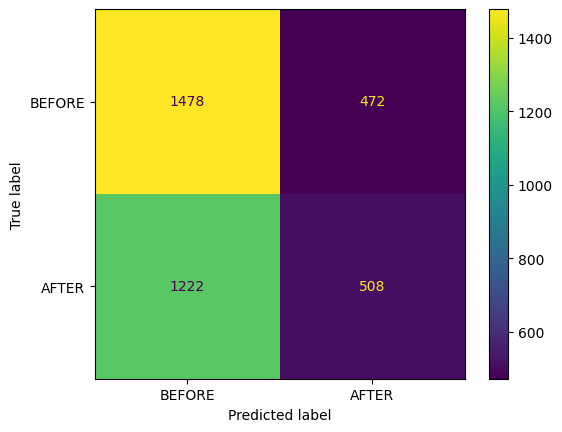

'\nLAST\n\n Accuracy: 0.5521739130434783  NT\nPrecision: 0.5324367088607594\n Recall: 0.3890173410404624\n F1: 0.4495657982631931\n\nAccuracy: 0.5581521739130435\nPrecision: 0.5670103092783505\n Recall: 0.2543352601156069\n F1: 0.35115722266560256\n\nwith stopwords\n\nAccuracy: 0.5472826086956522\nPrecision: 0.5287769784172662\n Recall: 0.3398843930635838\n F1: 0.41379310344827586\n '

In [43]:
### For n-gram BoW features with x common features for all three sets

from sklearn import metrics

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', colsample_bytree= 1,
                      learning_rate= 0.1, max_depth =6, min_child_weight = 1, subsample =1)


#{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1} TEXT
model.fit(namedtrain[comcol],y_train)
predicted = model.predict(namedval[comcol])                 #predict on validation set :)
#print(classification_report(y_val, predicted))

print(" Accuracy:",metrics.accuracy_score(y_val, predicted))
print("Precision:",metrics.precision_score(y_val, predicted))
print(" Recall:",metrics.recall_score(y_val, predicted))
print(" F1:",metrics.f1_score(y_val, predicted))

confusion_matrix = metrics.confusion_matrix(y_val, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['BEFORE', 'AFTER'])
cm_display.plot()
plt.show()

'''
LAST

 Accuracy: 0.5521739130434783  NT
Precision: 0.5324367088607594
 Recall: 0.3890173410404624
 F1: 0.4495657982631931

Accuracy: 0.5581521739130435
Precision: 0.5670103092783505
 Recall: 0.2543352601156069
 F1: 0.35115722266560256

with stopwords

Accuracy: 0.5472826086956522
Precision: 0.5287769784172662
 Recall: 0.3398843930635838
 F1: 0.41379310344827586
 '''

In [ ]:
'''from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# create a dictionary containing the hyperparameters to tune and the range of values to try

PARAMETERS = {"subsample":[0.75, 1],
              "colsample_bytree":[0.75, 1],
              "max_depth":[2, 6],
                "min_child_weight":[1, 5],
                "learning_rate":[0.1, 0.01]}


# create a validation set which will be used for early stopping
eval_set = [(namedval[comcol], y_val)]

# initialise an XGBoost classifier, set the number of estimators, evaluation metric &
#early stopping rounds
estimator = xgb.XGBClassifier(n_estimators=100,
                              n_jobs=-1,
                              eval_metric='logloss',
                                early_stopping_rounds=10)

# initialise GridSearchCV model by passing the XGB classifier we initialised in the last
#step along with the dictionary of parameters and values to try. We also set the number of
#folds to validate over along with the scoring metric to use

model = GridSearchCV(estimator=estimator,
                   param_grid=PARAMETERS,
                      cv=5,
                      scoring="neg_log_loss")

# fit model
model.fit(namedtrain[comcol], y_train, eval_set=eval_set, verbose=0)

# print out the best hyperparameters
print(model.best_params_)

#{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1}'''

In [44]:
# combine train and validate sets for shared features

X_train = pd.concat([namedtrain[comcol], namedval[comcol]], axis=0, join = 'inner')
print(X_train.shape)#
#X_train.columns = [''] * len(X_train.columns)
Y_train = pd.concat([y_train, y_val], axis=0)
print(Y_train.shape, y_train.shape, y_val.shape)
X_train
X_test = namedtest[comcol]
#X_test.columns = [''] * len(namedtest[comcol].columns)
X_test

(14719, 2423)
(14719,) (11039,) (3680,)


,ability,ability sleep,able,able fall,able fall asleep,able sleep,able sleep night,absolute,absolutely,accept,...,young,younger,youtube,zero,zero sleep,zoloft,zolpidem,zombie,zopiclone,zzzquil
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(X_train.columns)

2424

In [ ]:
features = X_train.columns
cat_features = []
for cat in X_train.select_dtypes(exclude="number"):
    cat_features.append(cat)
    X_train[cat] = X_train[cat].astype("category").cat.codes.astype("category")

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


SystemError: ignored

In [45]:
from sklearn import metrics

model2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss') #, colsample_bytree= 1,
                     # learning_rate= 0.1, max_depth= 6, min_child_weight= 1, subsample= 1)
model2.fit(X_train,Y_train)


predicted = model2.predict(X_test)  #predict on test set :)

print(" Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Precision:",metrics.precision_score(y_test, predicted))
print(" Recall:",metrics.recall_score(y_test, predicted))
print(" F1:",metrics.f1_score(y_test, predicted))

'''
 Accuracy: 0.5622282608695652 T
Precision: 0.578042328042328
 Recall: 0.25274725274725274
 F1: 0.35171026156941654


Accuracy: 0.5644021739130435
Precision: 0.551219512195122
 Recall: 0.39213418160786584
 F1: 0.45826292666441365


with stopwords
Accuracy: 0.5559782608695653
Precision: 0.5428313796212805
 Recall: 0.3481781376518219
 F1: 0.4242424242424243

 '''

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


 Accuracy: 0.5429347826086957
Precision: 0.5176294073518379
 Recall: 0.3990746096009254
 F1: 0.4506858262573481


'\n Accuracy: 0.5622282608695652 T\nPrecision: 0.578042328042328\n Recall: 0.25274725274725274\n F1: 0.35171026156941654\n\n\nAccuracy: 0.5644021739130435\nPrecision: 0.551219512195122\n Recall: 0.39213418160786584\n F1: 0.45826292666441365\n\n\nwith stopwords\nAccuracy: 0.5559782608695653\nPrecision: 0.5428313796212805\n Recall: 0.3481781376518219\n F1: 0.4242424242424243\n\n '

In [ ]:
'''from xgboost import XGBClassifier

from sklearn import metrics

model2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', colsample_bytree= 1,
                      learning_rate= 0.1, max_depth= 6, min_child_weight= 1, subsample= 1)
model2.fit(X_train,Y_train)


predicted = model2.predict(X_test)

y_prob1 = [probs[1] for probs in model2.predict_proba(X_test)]
y_prob0 = [probs[0] for probs in model2.predict_proba(X_test)]'''

`use_label_encoder` is deprecated in 1.7.0.


In [ ]:
'''#Accuracy on test set - malignant 1
print(f"Test accuracy: {accuracy_score(y_test, predicted).round(2)}")

# Confusion matrix test set
pd.DataFrame(
    confusion_matrix(y_test, predicted),
    columns=['Predicted Before', 'Predicted After'],
    index=['Before', 'After']
)

# Compute area under the curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#Set default figure size
plt.rcParams['figure.figsize'] = (8,8)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Diagnosing Breast Cancer")
plt.legend(loc="lower right")
plt.show()'''

'#Accuracy on test set - malignant 1\nprint(f"Test accuracy: {accuracy_score(y_test, predicted).round(2)}")\n\n# Confusion matrix test set\npd.DataFrame(\n    confusion_matrix(y_test, predicted),\n    columns=[\'Predicted Before\', \'Predicted After\'],\n    index=[\'Before\', \'After\']\n)\n\n# Compute area under the curve\nfpr, tpr, _ = roc_curve(y_test, y_prob)\nroc_auc = auc(fpr, tpr)\n\n#Set default figure size\nplt.rcParams[\'figure.figsize\'] = (8,8)\n\n# Plot ROC curve\nplt.figure()\nlw = 2\nplt.plot(fpr, tpr, color=\'darkorange\',\n         lw=lw, label=\'ROC curve (area = %0.2f)\' % roc_auc)\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=lw, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title("Diagnosing Breast Cancer")\nplt.legend(loc="lower right")\nplt.show()'

In [ ]:
'''obs_idx = 48 # Relates to a specific patient observation
local_plot = shap.force_plot(explainer.expected_value,
                             shap_values[obs_idx],
                 features=X_train.loc[obs_idx],
                 feature_names=X_train.columns, matplotlib=True)'''

'obs_idx = 48 # Relates to a specific patient observation\nlocal_plot = shap.force_plot(explainer.expected_value, \n                             shap_values[obs_idx], \n                 features=X_train.loc[obs_idx],\n                 feature_names=X_train.columns, matplotlib=True)'

In [ ]:
import shap
#clf = XGBClassifier(eval_metric='mlogloss')
#clf.fit(X_train,Y_train)
clf = model2
# Get SHAP feature importances
explainer = shap.TreeExplainer(clf)

shap_values = explainer.shap_values(X_train)
rf_resultX = pd.DataFrame(shap_values, columns = features)
vals = np.abs(rf_resultX.values).mean(0)
shap_importance = pd.DataFrame(list(zip(features, vals)), columns=['col_name', 'feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
print(shap_importance)
'''   col_name  feature_importance_vals
372        covid                 0.066889
1567  quarantine                 0.049632
1750       sleep                 0.033949
978     insomnia                 0.031553
1440    pandemic                 0.030170
...          ...                      ...
976       inside                 0.000000
975       insane                 0.000000
974        input                 0.000000
973    initially                 0.000000
2423     zzzquil                 0.000000


1748       sleep                 0.026486
857       health                 0.021442
202     benadryl                 0.012085
63        ambien                 0.011943
1994      summer                 0.011543
'''

SystemError: ignored

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


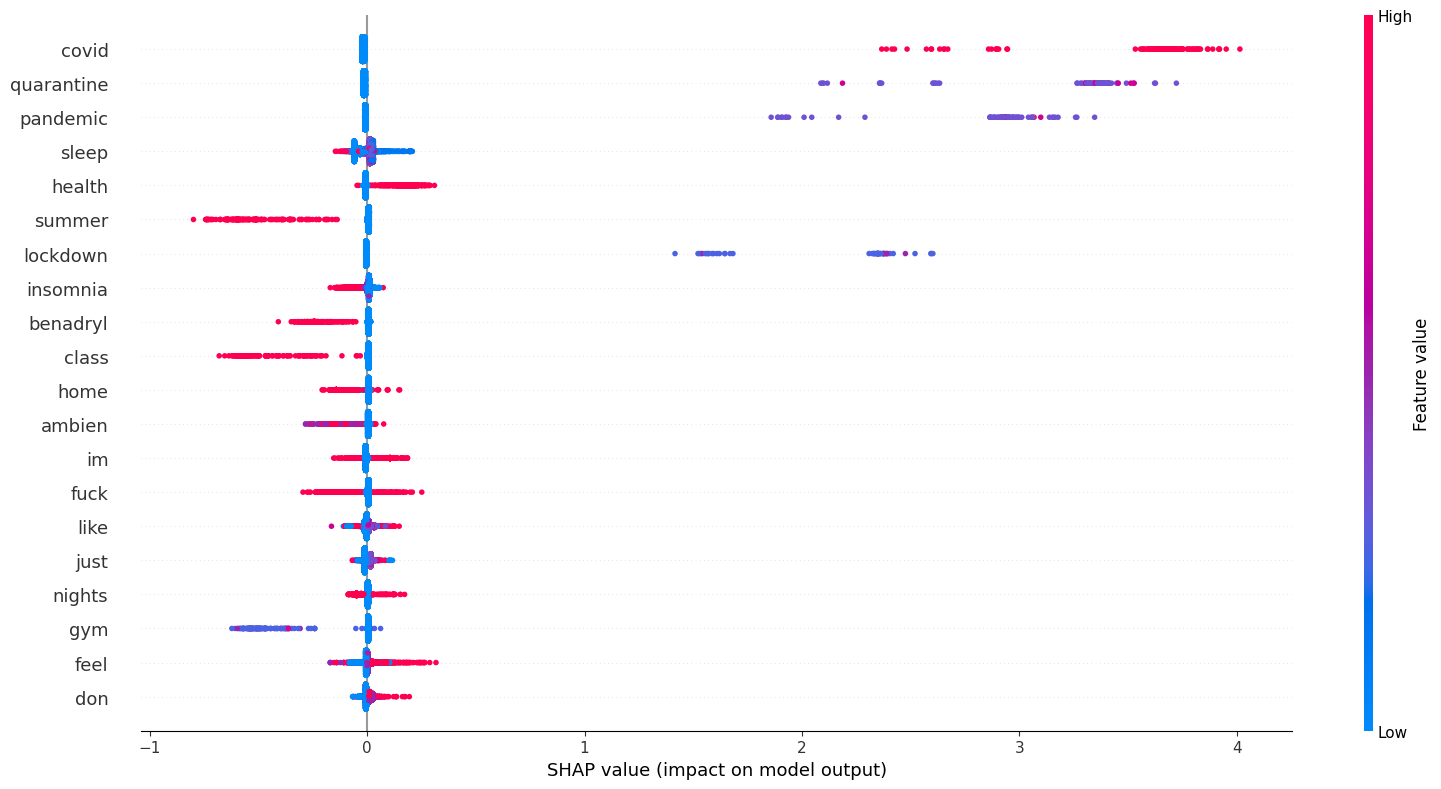

In [ ]:
plt_shap = shap.summary_plot(shap_values, #Use Shap values array
                             features=X_train, # Use training set features
                             feature_names=X_train.columns, #Use column name
                             plot_size=(16,8)) # Change plot size

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


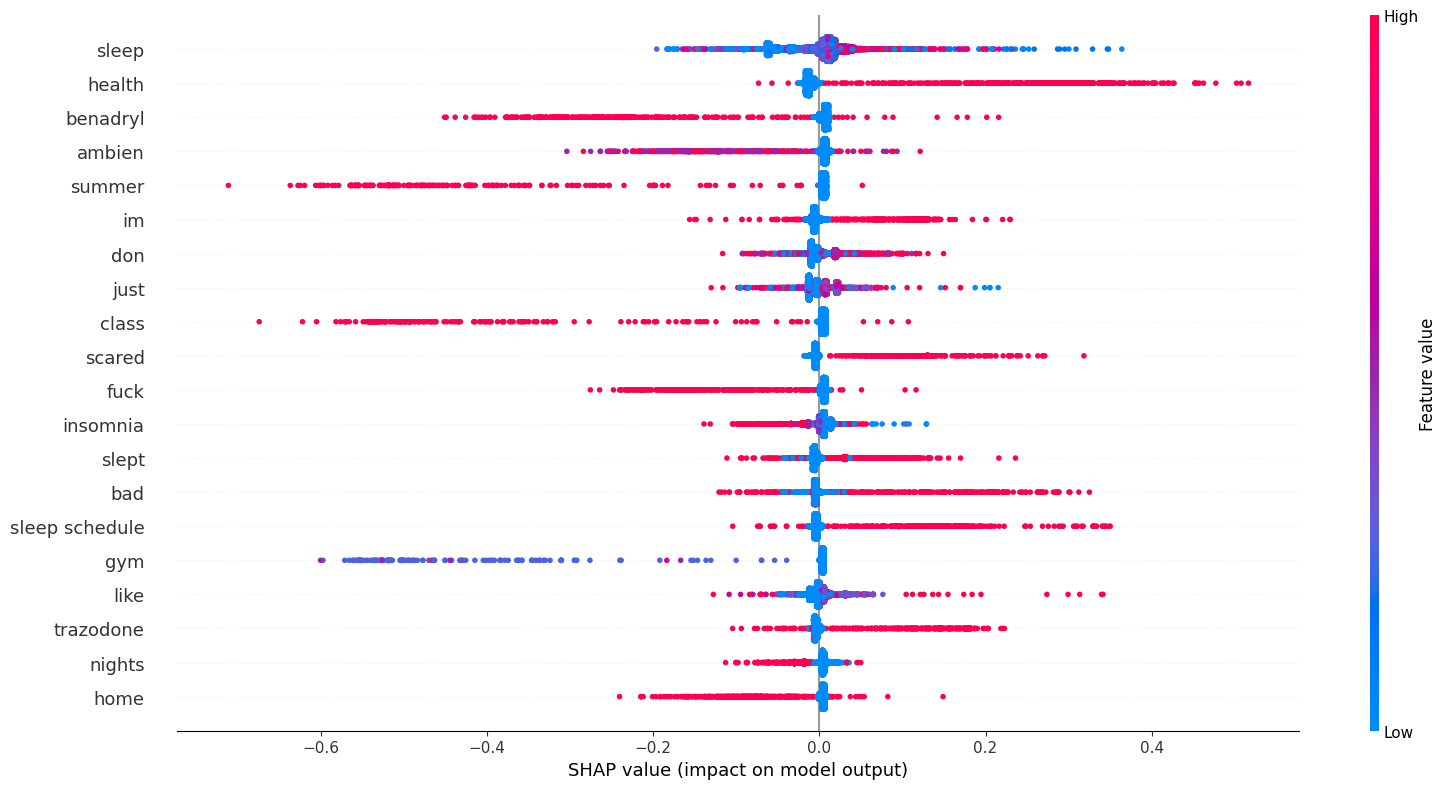

In [ ]:
plt_shap = shap.summary_plot(shap_values, #Use Shap values array
                             features=X_train, # Use training set features
                             feature_names=X_train.columns, #Use column name
                             plot_size=(16,8)) # Change plot size

In [ ]:
'''plt_shap = shap.summary_plot(shap_values, #Use Shap values array
                             features=X_train, # Use training set features
                             feature_names=X_train.columns, #Use column name
                             plot_size=(30,15)) # Change plot size'''

'plt_shap = shap.summary_plot(shap_values, #Use Shap values array\n                             features=X_train, # Use training set features\n                             feature_names=X_train.columns, #Use column name\n                             plot_size=(30,15)) # Change plot size'

In [ ]:
X_train.iloc[1,:]

ability             0
ability sleep       0
able                0
able fall           0
able fall asleep    0
                   ..
zoloft              0
zolpidem            0
zombie              0
zopiclone           0
zzzquil             0
Name: 1, Length: 2423, dtype: int64

In [ ]:
#shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_explain.iloc[0,:])
#shap.force_plot(explainer.expected_value, shap_values[0,:], X_display.iloc[0,:])
#Visualize a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[100,:], X_train.iloc[100,:])

In [ ]:
#Visualize many predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:10,:], X_train.iloc[:10,:])

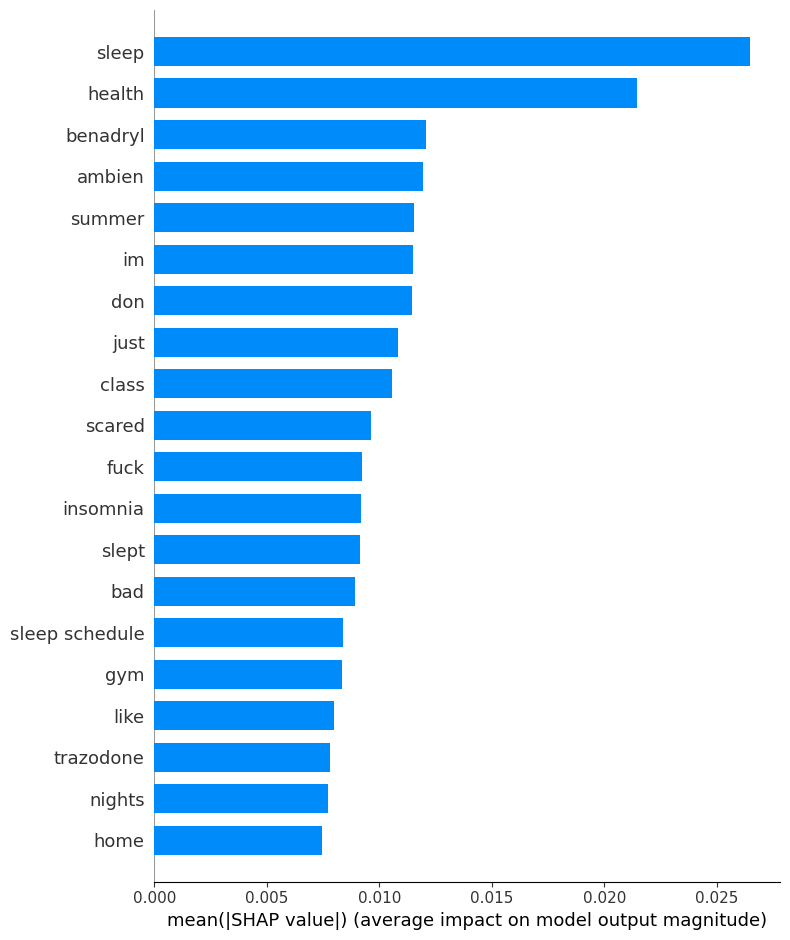

In [ ]:
#Bar chart of mean importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

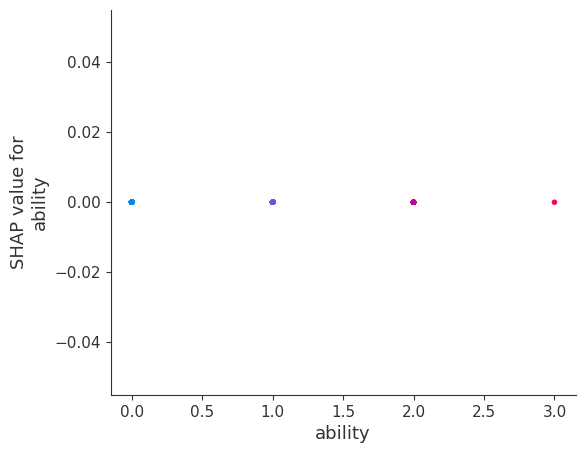

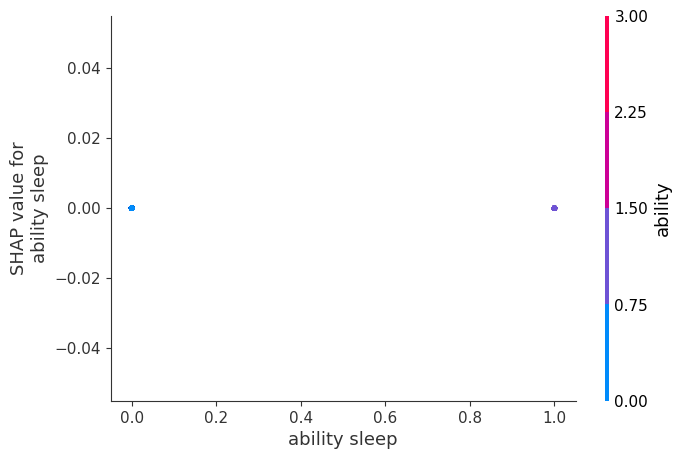

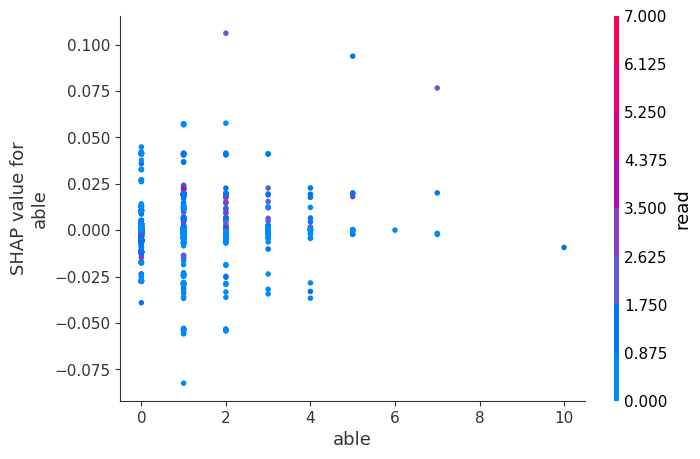

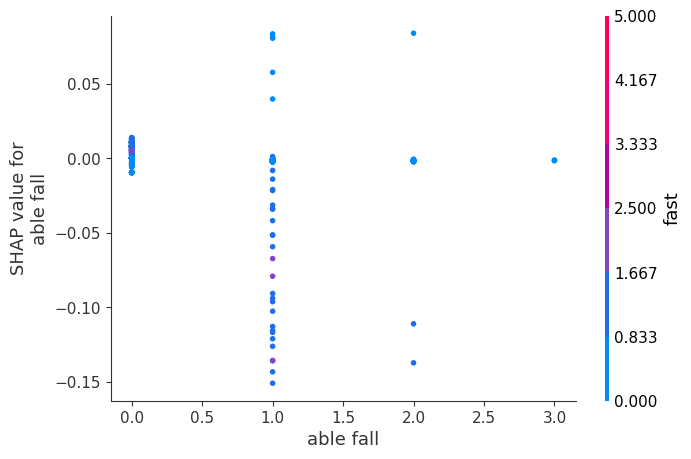

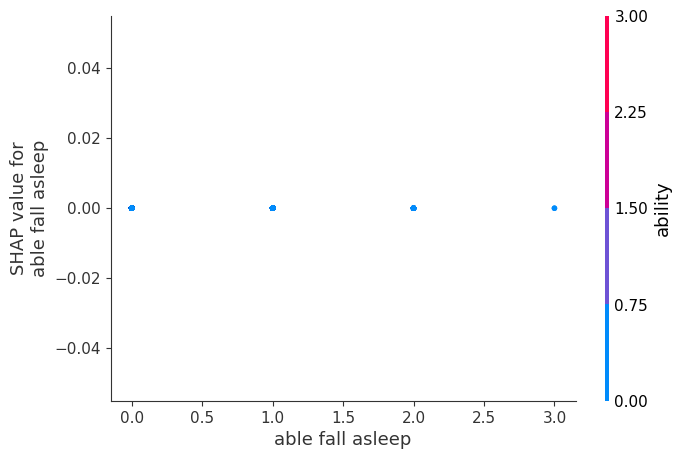

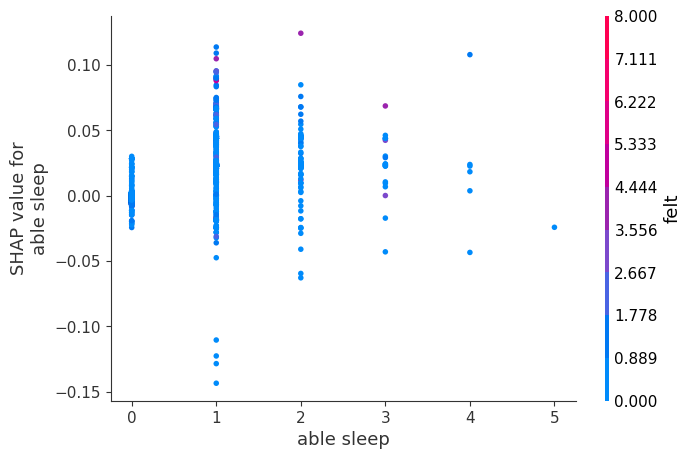

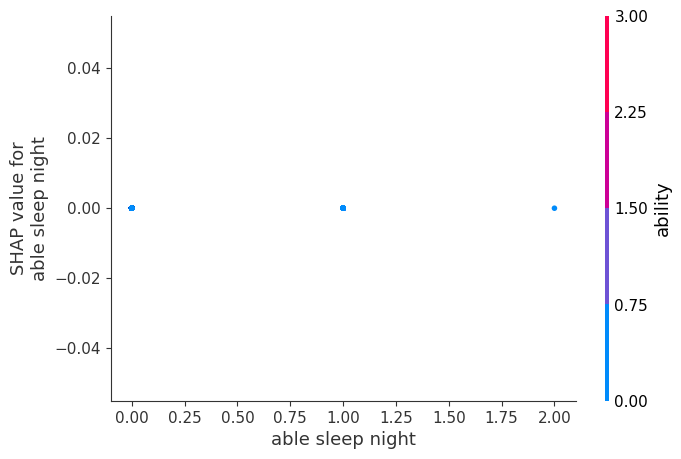

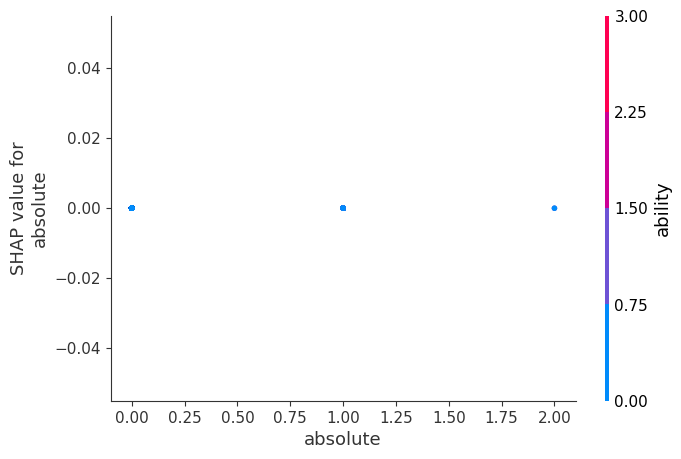

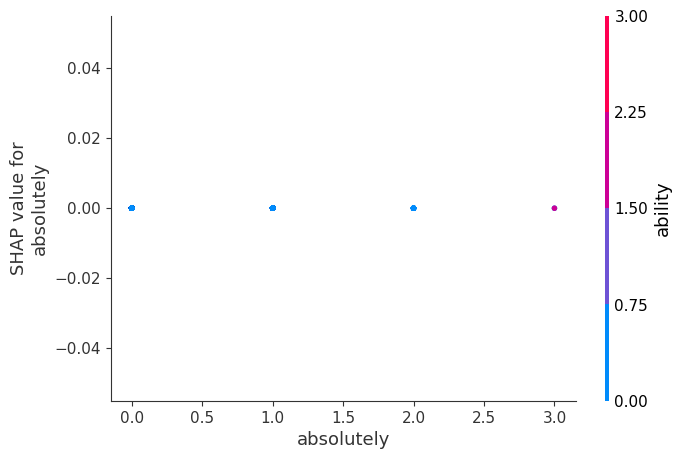

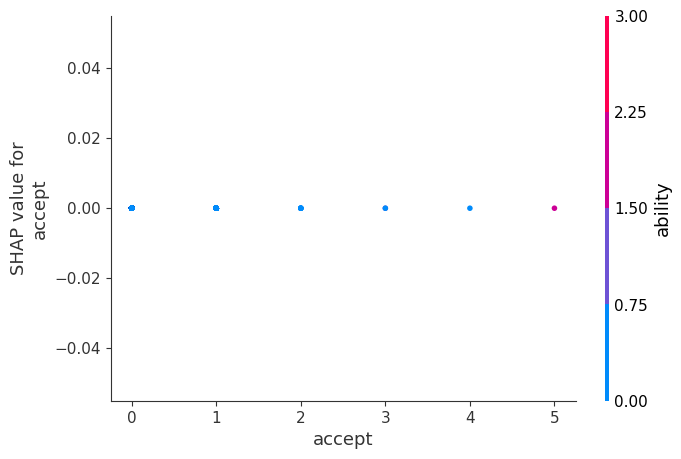

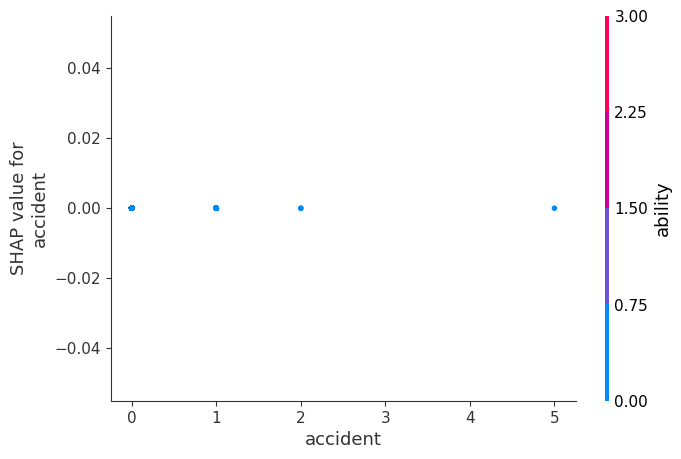

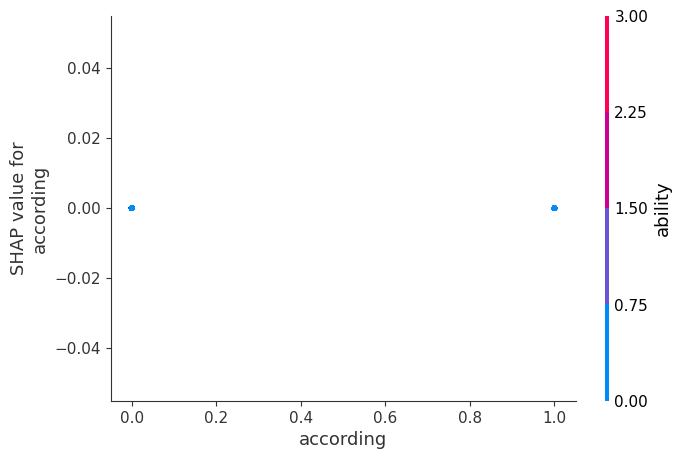

KeyboardInterrupt: ignored

In [ ]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_train, display_features=X_train)

#https://slundberg.github.io/shap/notebooks/Census%20income%20classification%20with%20XGBoost.html

In [ ]:
plt_shap = shap.summary_plot(shap_values, #Use Shap values array
                             features=X_train, # Use training set features
                             feature_names=X_train.columns, #Use column name
                             plot_size=(30,15)) # Change plot size

In [ ]:
#shap.plots.bar(shap_values)

#https://github.com/slundberg/shap#citations

In [ ]:
# visualize the first prediction's explanation
#shap.plots.waterfall(shap_values[0])

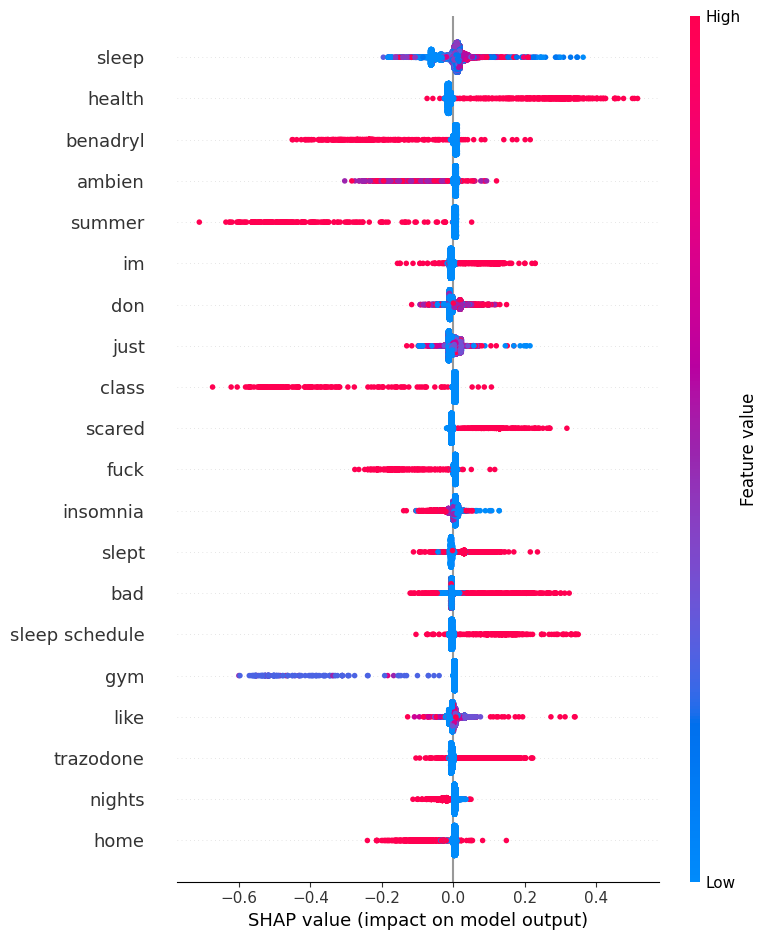

In [ ]:
shap.summary_plot(shap_values, X_train, max_display=20)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


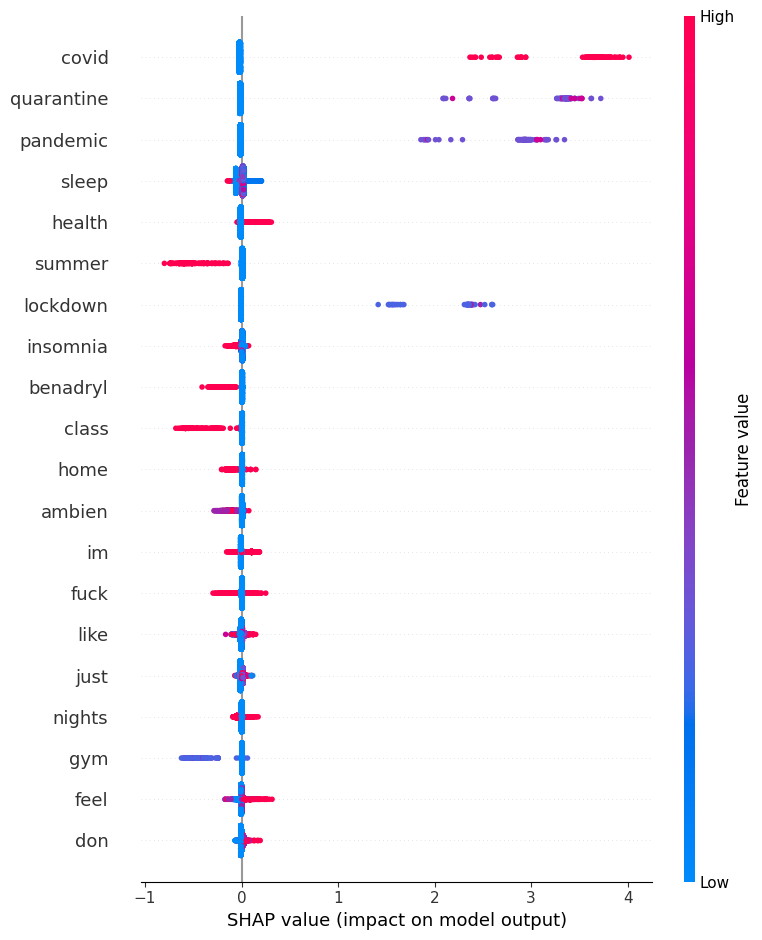

In [ ]:
shap.summary_plot(shap_values, X_train, max_display=20)

In [ ]:
#shap.plots.waterfall(shap_values[X_train], max_display=5)

In [ ]:
#shap.plots.bar(shap_values[X_train])

In [ ]:
shap.summary_plot(shap_values[X_train].abs.max(0), X_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


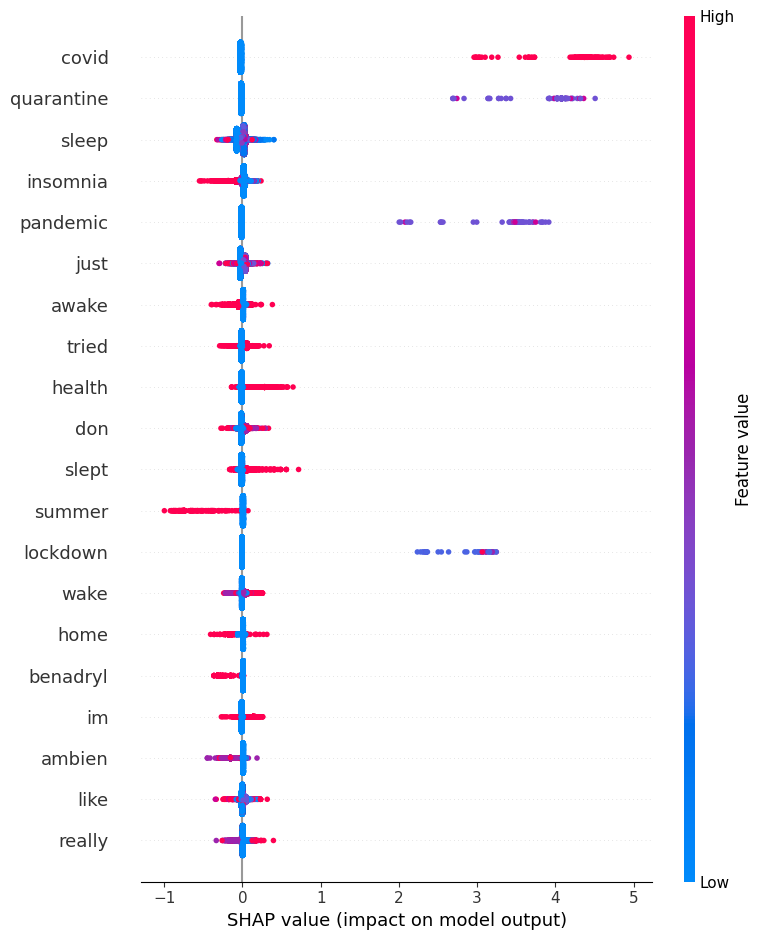

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
shap_values.shape, X_train.shape

((14719, 2423), (14719, 2423))

In [ ]:
def get_top_global_features_of_specific_class(model_output_number: int, amount_of_features: int, shap_values,
                                        feature_names):
    # extract top features model_output_number
    shap_sum = shap_values[model_output_number][0]
    importance_df = pd.DataFrame([feature_names, shap_sum.tolist()]).T
    importance_df.columns = ['feature-name', 'shap_importance']
    importance_df = importance_df.sort_values('shap_importance', ascending=False)
    # return top <amount_of_features> features and their values
    return importance_df.head(amount_of_features)

In [ ]:
#shap.plots.waterfall(shap_values[X_train])

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['BEFORE', 'AFTER'])
#cm_display.plot()
#plt.show()

<Figure size 800x800 with 0 Axes>

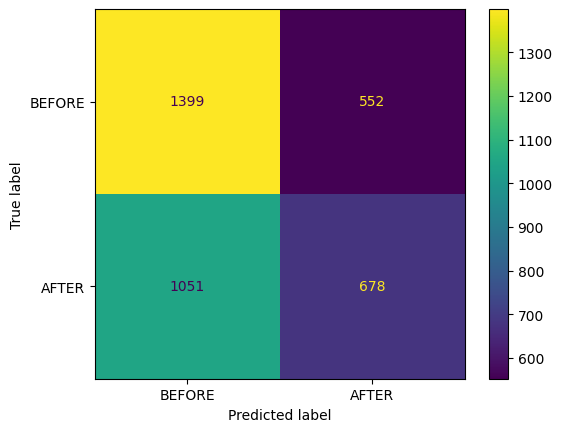

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
plt.figure(figsize=(8,8))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['BEFORE', 'AFTER'])
cm_display.plot()
plt.show()#NT

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['BEFORE', 'AFTER'])
cm_display.plot()
plt.show()  #with stopwords

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['BEFORE', "AFTER"], yticklabels=['BEFORE', 'AFTER'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)


In [ ]:
namedtest[comcol].shape

In [ ]:
X_train.shape

<Axes: >

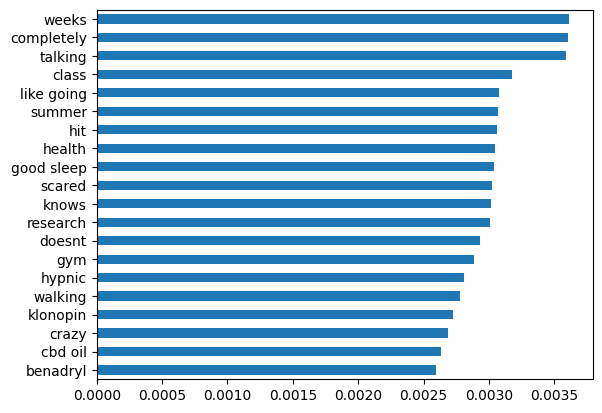

In [ ]:
feat_importances = pd.Series(model2.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
# covid and quarantine removed

In [ ]:
feat_importances = pd.Series(model2.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
#4 removed

In [ ]:
feat_importances = pd.Series(model2.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
#

<Axes: >

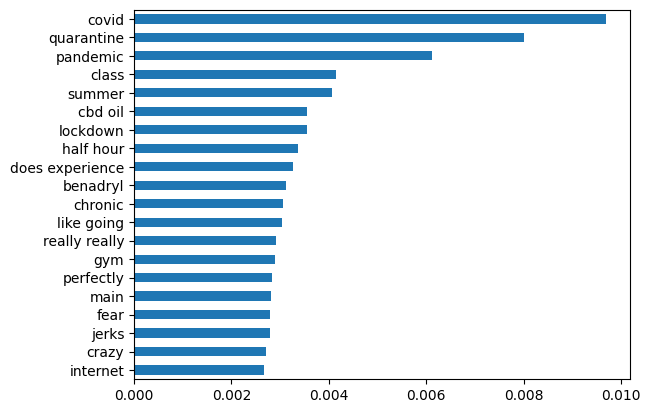

In [ ]:
feat_importances = pd.Series(model2.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
#NT